In [1]:
import torch
from diffusers import DiffusionPipeline
from PIL import Image
from IPython.display import display

In [2]:
def generate_image(prompt, aspect_ratio="1:1", image_type="Photo", approach="Realistic", cinematic_lighting=False, perspective="Normal"):
    """
    Generates an image using Stable Diffusion XL with user-defined parameters.

    Args:
        prompt (str): The text prompt for the image.
        aspect_ratio (str, optional): The aspect ratio of the image (e.g., "1:1", "16:9", "4:3"). Defaults to "1:1".
        image_type (str, optional): The type of image (e.g., "Photo", "Painting", "Digital Art"). Defaults to "Photo".
        approach (str, optional): The artistic approach (e.g., "Realistic", "Abstract", "Impressionist"). Defaults to "Realistic".
        cinematic_lighting (bool, optional): Whether to use cinematic lighting. Defaults to False.
        perspective (str, optional): The camera perspective (e.g., "Normal", "Wide-angle", "Close-up"). Defaults to "Normal".

    Returns:
        PIL.Image: The generated image.
    """
    # Load the model (this only needs to happen once)
    if not hasattr(generate_image, 'pipeline'):
        generate_image.pipeline = DiffusionPipeline.from_pretrained(
            "stabilityai/stable-diffusion-xl-base-1.0",
            torch_dtype=torch.float16,
            use_safetensors=True,
            variant="fp16"
        ).to("cuda")

    pipeline = generate_image.pipeline # Use the same pipeline

    # Construct the full prompt
    full_prompt = f"A {image_type} of {prompt}, {approach} style"
    if cinematic_lighting:
        full_prompt += ", cinematic lighting"
    if perspective != "Normal":
        full_prompt += f", {perspective} perspective"

    # Set image dimensions based on aspect ratio
    width, height = 1024, 1024  # Default
    if aspect_ratio == "16:9":
        width = 1024
        height = 576
    elif aspect_ratio == "4:3":
        width = 1024
        height = 768
    elif aspect_ratio == "1:1":
        width = 1024
        height = 1024
    elif aspect_ratio == "9:16":
        width = 576
        height = 1024

    # Generate the image
    image = pipeline(prompt=full_prompt, width=width, height=height).images[0]
    return image

In [3]:
def chatbot():
    """
    Simulates a chatbot interface for generating images with Stable Diffusion XL.
    """
    print("Welcome to the Stable Diffusion XL Image Generator!")

    while True:
        prompt = input("Please enter your prompt (or type 'exit' to quit): ")
        if prompt.lower() == 'exit':
            break

        aspect_ratio = input("Enter aspect ratio (1:1, 16:9, 4:3, 9:16): ") or "1:1"
        image_type = input("Enter image type (Photo, Painting, Digital Art): ") or "Photo"
        approach = input("Enter artistic approach (Realistic, Abstract, Impressionist): ") or "Realistic"
        cinematic_lighting = input("Use cinematic lighting? (yes/no): ").lower() == "yes"
        perspective = input("Enter camera perspective (Normal, Wide-angle, Close-up): ") or "Normal"

        try:
            image = generate_image(prompt, aspect_ratio, image_type, approach, cinematic_lighting, perspective)
            display(image)  # Display the image in the Colab notebook
            image.save("generated_image.png") #save
            print("Image generated and saved as 'generated_image.png'")
        except Exception as e:
            print(f"Error generating image: {e}")
            print("Please check your parameters and try again.")

Welcome to the Stable Diffusion XL Image Generator!
Please enter your prompt (or type 'exit' to quit): A cute, fluffy white anthropomorphic panda surfing on a big ocean wave during a vibrant sunset. The panda is standing confidently on a colorful surfboard, wearing tropical Hawaiian floral swim shorts. His fur is slightly wet, glistening under the golden light. His sunglasses are secured tightly on his head as he rides the wave with excitement and balance. The background shows sparkling blue waters, palm trees along the distant beach, and a sky painted with vivid hues of orange, pink, and purple from the setting sun. Small sea spray droplets sparkle around him, creating a magical, energetic atmosphere. Pixar-style lighting, ultra-high-resolution, hyper-realistic textures, dynamic action scene. Full body visible. No text or writing in the image.
Enter aspect ratio (1:1, 16:9, 4:3, 9:16): 9:16
Enter image type (Photo, Painting, Digital Art): Photo
Enter artistic approach (Realistic, Abst

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (162 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['background shows sparkling blue waters, palm trees along the distant beach, and a sky painted with vivid hues of orange, pink, and purple from the setting sun. small sea spray droplets sparkle around him, creating a magical, energetic atmosphere. pixar - style lighting, ultra - high - resolution, hyper - realistic textures, dynamic action scene. full body visible. no text or writing in the image., realistic style, cinematic lighting']
Token indices sequence length is longer than the specified maximum sequence length for this model (162 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77

  0%|          | 0/50 [00:00<?, ?it/s]

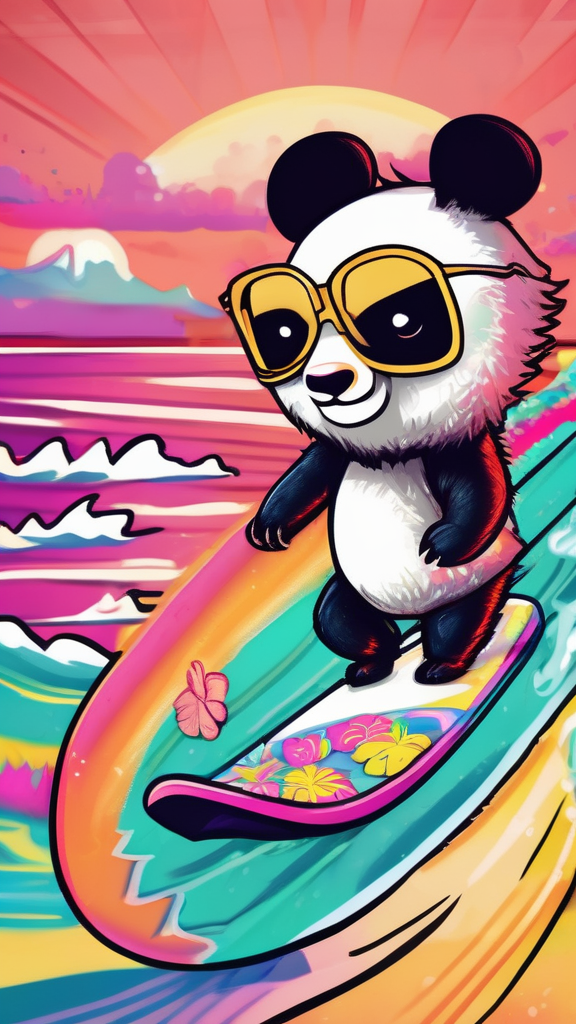

Image generated and saved as 'generated_image.png'


In [ ]:
chatbot()